In [65]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, filters, transform, color
from skimage.feature import orb, match_descriptors, plot_matches

In [66]:
def prepare(im : np.ndarray):
    return filters.gaussian(color.rgb2gray(im), sigma=0.5)


In [67]:
# Setup and prepare the image to work on
input_img = data.camera()
img = prepare(input_img)


In [68]:
# Setup of image to feature match with
img_rotated = transform.warp(
    img,
    transform.AffineTransform(
        scale=(1.3, 1.1), 
        rotation=0.5,
        translation=(0, -200))
)

In [69]:
# Create feature detectors/extractors (ORB), obtain features and match them against each other.

detectorA = orb.ORB()
detectorB = orb.ORB()

detectorA.detect_and_extract(img)
detectorB.detect_and_extract(img_rotated)

matches = match_descriptors(detectorA.descriptors, detectorB.descriptors)

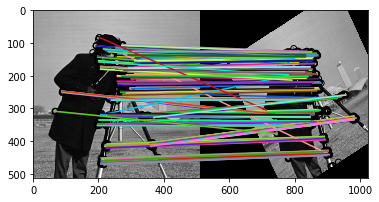

In [70]:
# Plot the images and matches

fig, axes = plt.subplots(1, 1)

plot_matches(axes, img, img_rotated, detectorA.keypoints, detectorB.keypoints, matches)

plt.show()